In [1]:
# local import for testing
import sys, os
sys.path.insert(1, '../src/SupplyNetPy/Components/')
import core as scm
import utilities as scm
import simpy


def print_performance_metrics(supplychainnet):
    print("Performance Metrics:")
    print("Total Available Inventory:", supplychainnet["total_available_inv"])
    print("Average Available Inventory:", supplychainnet["avg_available_inv"])
    print("Total Inventory Carry Cost:", supplychainnet["total_inv_carry_cost"])
    print("Total Inventory Spend:", supplychainnet["total_inv_spend"])
    print("Total Transport Cost:", supplychainnet["total_transport_cost"])
    print("Total Revenue:", supplychainnet["total_revenue"])
    print("Total Cost:", supplychainnet["total_cost"])
    print("Total Profit:", supplychainnet["total_profit"])
    print("Total Demand Placed by Customers:", supplychainnet["total_demand_by_customers"])
    print("Total Fulfillment Received by Customers:", supplychainnet["total_fulfillment_received_by_customers"])
    print("Total Demand Placed by Site:", supplychainnet["total_demand_by_site"])
    print("Total Fulfillment Received by Site:", supplychainnet["total_fulfillment_received_by_site"])
    print("Total Demand Placed:", supplychainnet["total_demand"])
    print("Total Fulfillment Received:", supplychainnet["total_fulfillment_received"])
    print("Average Cost per Order:", supplychainnet["avg_cost_per_order"])
    print("Average Cost per Item:", supplychainnet["avg_cost_per_item"])

INFO Distribution Center 1 - 0.0000:D1: Inventory levels:1000
INFO Distribution Center 2 - 0.0000:D2: Inventory levels:1500


INFO Distribution Center 3 - 0.0000:D3: Inventory levels:2000
INFO Distribution Center 4 - 0.0000:D4: Inventory levels:2500
INFO Distribution Center 5 - 0.0000:D5: Inventory levels:3000
INFO Distribution Center 6 - 0.0000:D6: Inventory levels:3500
INFO Distribution Center 7 - 0.0000:D7: Inventory levels:4000
INFO Distribution Center 8 - 0.0000:D8: Inventory levels:4500
INFO Demand 1 - 0.0000:demand_D1:Customer1:Order quantity:20, available.
INFO Distribution Center 1 - 0.0000:D1: Inventory levels:940
INFO Demand 2 - 0.0000:demand_D2:Customer1:Order quantity:40, available.
INFO Demand 3 - 0.0000:demand_D3:Customer1:Order quantity:60, available.
INFO Distribution Center 2 - 0.0000:D2: Inventory levels:1360
INFO Demand 4 - 0.0000:demand_D4:Customer1:Order quantity:80, available.
INFO Demand 5 - 0.0000:demand_D5:Customer1:Order quantity:100, available.
INFO Distribution Center 3 - 0.0000:D3: Inventory levels:1780
INFO Demand 6 - 0.0000:demand_D6:Customer1:Order quantity:120, available.
INF

Performance Metrics:
Total Available Inventory: 17160
Average Available Inventory: 17055.483870967742
Total Inventory Carry Cost: 118553.6
Total Inventory Spend: 2202000
Total Transport Cost: 5820
Total Revenue: 5856000
Total Cost: 2326373.6
Total Profit: 3529626.4
Total Demand Placed by Customers: [176, 19520]
Total Fulfillment Received by Customers: [166, 18260]
Total Demand Placed by Site: [18, 15240]
Total Fulfillment Received by Site: [17, 14680]
Total Demand Placed: [194, 34760]
Total Fulfillment Received: [183, 32940]
Average Cost per Order: 11991.61649484536
Average Cost per Item: 66.92674338319908


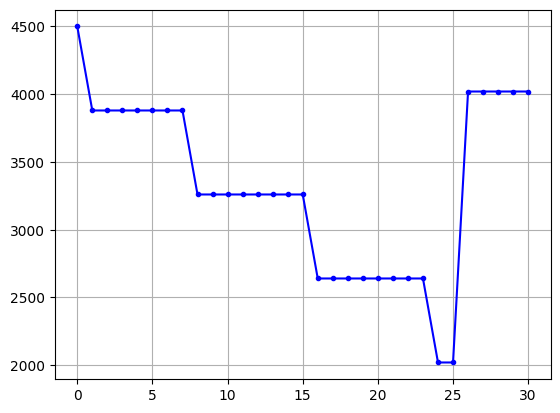

In [ ]:
simtime = 31
env = simpy.Environment()
raw_mat = scm.RawMaterial(ID="RM1", name="raw materials mouse", extraction_quantity=650, 
                          extraction_time=1, mining_cost=0.01, cost=0.1) 

supplier = scm.Supplier(env=env, ID='S1', name='Supplier', node_type="infinite_supplier")

mouse = scm.Product(ID="B1", name="WM 1", manufacturing_cost=10, manufacturing_time=0, sell_price=300, buy_price=150,
                             raw_materials=[{"raw_material": raw_mat, "quantity": 1}], batch_size=2500)

distributor1 = scm.InventoryNode(env=env, ID='D1', name='Distribution Center 1', node_type="distributor",
                                capacity=1000, initial_level=1000, inventory_holding_cost=0.22,
                                replenishment_policy = scm.SSReplenishment, policy_param={'s':500, 'S':1000},
                                product_buy_price=150, product_sell_price=300)
distributor2 = scm.InventoryNode(env=env, ID='D2', name='Distribution Center 2', node_type="distributor",
                                capacity=1500, initial_level=1500, inventory_holding_cost=0.22,
                                replenishment_policy = scm.SSReplenishment, policy_param={'s':1000, 'S':1500},
                                product_buy_price=150, product_sell_price=300)
distributor3 = scm.InventoryNode(env=env, ID='D3', name='Distribution Center 3', node_type="distributor",
                                capacity=2000, initial_level=2000, inventory_holding_cost=0.22,
                                replenishment_policy = scm.SSReplenishment, policy_param={'s':1500, 'S':2000},
                                product_buy_price=150, product_sell_price=300)
distributor4 = scm.InventoryNode(env=env, ID='D4', name='Distribution Center 4', node_type="distributor",
                                capacity=2500, initial_level=2500, inventory_holding_cost=0.22,
                                replenishment_policy = scm.SSReplenishment, policy_param={'s':2000, 'S':2500},
                                product_buy_price=150, product_sell_price=300)
distributor5 = scm.InventoryNode(env=env, ID='D5', name='Distribution Center 5', node_type="distributor",
                                capacity=3000, initial_level=3000, inventory_holding_cost=0.22,
                                replenishment_policy = scm.RQReplenishment, policy_param={'R':1500, 'Q':1500},
                                product_buy_price=150, product_sell_price=300)
distributor6 = scm.InventoryNode(env=env, ID='D6', name='Distribution Center 6', node_type="distributor",
                                capacity=3500, initial_level=3500, inventory_holding_cost=0.22,
                                replenishment_policy = scm.RQReplenishment, policy_param={'R':2000, 'Q':1500},
                                product_buy_price=150, product_sell_price=300)
distributor7 = scm.InventoryNode(env=env, ID='D7', name='Distribution Center 7', node_type="distributor",
                                capacity=4000, initial_level=4000, inventory_holding_cost=0.22,
                                replenishment_policy = scm.RQReplenishment, policy_param={'R':2000, 'Q':2000},
                                product_buy_price=150, product_sell_price=300)
distributor8 = scm.InventoryNode(env=env, ID='D8', name='Distribution Center 8', node_type="distributor",
                                capacity=4500, initial_level=4500, inventory_holding_cost=0.22,
                                replenishment_policy = scm.RQReplenishment, policy_param={'R':2500, 'Q':2000},
                                product_buy_price=150, product_sell_price=300)

link1= scm.Link(env=env, ID='L1', source=supplier, sink=distributor1, cost=30, lead_time=lambda: 0.5)
link2 = scm.Link(env=env, ID='L2', source=supplier, sink=distributor2, cost=30, lead_time=lambda: 0.5)
link3 = scm.Link(env=env, ID='L3', source=supplier, sink=distributor3, cost=30, lead_time=lambda: 0.5)
link4 = scm.Link(env=env, ID='L4', source=supplier, sink=distributor4, cost=30, lead_time=lambda: 0.5)
link5 = scm.Link(env=env, ID='L5', source=supplier, sink=distributor5, cost=30, lead_time=lambda: 0.5)
link6 = scm.Link(env=env, ID='L6', source=supplier, sink=distributor6, cost=30, lead_time=lambda: 0.5)
link7 = scm.Link(env=env, ID='L7', source=supplier, sink=distributor7, cost=30, lead_time=lambda: 0.5)
link8 = scm.Link(env=env, ID='L8', source=supplier, sink=distributor8, cost=30, lead_time=lambda: 0.5)

demand1 = scm.Demand(env=env, ID='demand_D1', name='Demand 1', order_arrival_model=lambda: 1, order_quantity_model=lambda:20, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor1)
demand2 = scm.Demand(env=env, ID='demand_D2', name='Demand 2', order_arrival_model=lambda: 1, order_quantity_model=lambda:40, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor1)
demand3 = scm.Demand(env=env, ID='demand_D3', name='Demand 3', order_arrival_model=lambda: 2, order_quantity_model=lambda:60, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor2)
demand4 = scm.Demand(env=env, ID='demand_D4', name='Demand 4', order_arrival_model=lambda: 2, order_quantity_model=lambda:80, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor2)
demand5 = scm.Demand(env=env, ID='demand_D5', name='Demand 5', order_arrival_model=lambda: 3, order_quantity_model=lambda:100, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor3)
demand6 = scm.Demand(env=env, ID='demand_D6', name='Demand 6', order_arrival_model=lambda: 3, order_quantity_model=lambda:120, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor3)
demand7 = scm.Demand(env=env, ID='demand_D7', name='Demand 7', order_arrival_model=lambda: 4, order_quantity_model=lambda:140, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor4)
demand8 = scm.Demand(env=env, ID='demand_D8', name='Demand 8', order_arrival_model=lambda: 4, order_quantity_model=lambda:160, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor4)
demand9 = scm.Demand(env=env, ID='demand_D9', name='Demand 9', order_arrival_model=lambda: 5, order_quantity_model=lambda:180, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor5)
demand10 = scm.Demand(env=env, ID='demand_D10', name='Demand 10', order_arrival_model=lambda: 5, order_quantity_model=lambda:200, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor5)
demand11 = scm.Demand(env=env, ID='demand_D11', name='Demand 11', order_arrival_model=lambda: 6, order_quantity_model=lambda:220, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor6)
demand12 = scm.Demand(env=env, ID='demand_D12', name='Demand 12', order_arrival_model=lambda: 6, order_quantity_model=lambda:240, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor6)
demand13 = scm.Demand(env=env, ID='demand_D13', name='Demand 13', order_arrival_model=lambda: 7, order_quantity_model=lambda:260, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor7)
demand14 = scm.Demand(env=env, ID='demand_D14', name='Demand 14', order_arrival_model=lambda: 7, order_quantity_model=lambda:280, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor7)
demand15 = scm.Demand(env=env, ID='demand_D15', name='Demand 15', order_arrival_model=lambda: 8, order_quantity_model=lambda:300, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor8)
demand16 = scm.Demand(env=env, ID='demand_D16', name='Demand 16', order_arrival_model=lambda: 8, order_quantity_model=lambda:320, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor8)


inventory_nodes = [supplier,distributor1, distributor2, distributor3, distributor4, distributor5, distributor6, distributor7, distributor8]
inventory_links = [link1, link2, link3, link4, link5, link6, link7, link8]
demand_nodes = [demand1, demand2, demand3, demand4, demand5, demand6, demand7, demand8, demand9, demand10, demand11, demand12, demand13, demand14, demand15, demand16]
scm.global_logger.enable_logging()
env.run(until=simtime)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(env=env, nodes = inventory_nodes, links = inventory_links, demands = demand_nodes)
supplynet = scm.simulate_sc_net(supplynet, sim_time=simtime)
for node in inventory_nodes:
    inv_levels = np.array(node.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
print_performance_metrics(supplynet)


INFO Factory - 0.0000:F1: Inventory levels:2200
INFO Distribution Center 1 - 0.0000:D1: Inventory levels:1000
INFO Distribution Center 2 - 0.0000:D2: Inventory levels:1500
INFO Distribution Center 3 - 0.0000:D3: Inventory levels:2000
INFO Distribution Center 4 - 0.0000:D4: Inventory levels:2500
INFO Distribution Center 5 - 0.0000:D5: Inventory levels:3000
INFO Distribution Center 6 - 0.0000:D6: Inventory levels:3500
INFO Distribution Center 7 - 0.0000:D7: Inventory levels:4000
INFO Distribution Center 8 - 0.0000:D8: Inventory levels:4500
INFO Demand 1 - 0.0000:demand_D1:Customer1:Order quantity:20, available.
INFO Distribution Center 1 - 0.0000:D1: Inventory levels:940
INFO Demand 2 - 0.0000:demand_D2:Customer1:Order quantity:40, available.
INFO Demand 3 - 0.0000:demand_D3:Customer1:Order quantity:60, available.
INFO Distribution Center 2 - 0.0000:D2: Inventory levels:1360
INFO Demand 4 - 0.0000:demand_D4:Customer1:Order quantity:80, available.
INFO Demand 5 - 0.0000:demand_D5:Customer

Performance Metrics:
Total Available Inventory: 15440
Average Available Inventory: 17876.129032258064
Total Inventory Carry Cost: 121814.44000000002
Total Inventory Spend: 6549000
Total Transport Cost: 13410
Total Revenue: 16368000
Total Cost: 6684224.4399999995
Total Profit: 9683775.56
Total Demand Placed by Customers: [420, 31540]
Total Fulfillment Received by Customers: [391, 29760]
Total Demand Placed by Site: [56, 45800]
Total Fulfillment Received by Site: [53, 43660]
Total Demand Placed: [476, 77340]
Total Fulfillment Received: [444, 73420]
Average Cost per Order: 14042.48831932773
Average Cost per Item: 86.42648616498577


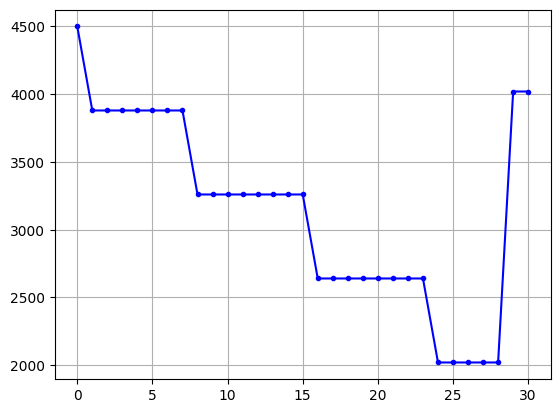

In [4]:
simtime = 31
env = simpy.Environment()
raw_mat = scm.RawMaterial(ID="RM1", name="raw materials mouse", extraction_quantity=650, 
                          extraction_time=1, mining_cost=0.01, cost=0.1) 

supplier = scm.Supplier(env=env, ID='S1', name='Supplier', node_type="infinite_supplier")

mouse = scm.Product(ID="B1", name="WM 1", manufacturing_cost=10, manufacturing_time=0, sell_price=300, buy_price=150,
                             raw_materials=[{"raw_material": raw_mat, "quantity": 1}], batch_size=2500)

factory = scm.InventoryNode(env=env, ID='F1', name='Factory', node_type="factory",
                            capacity=3000, initial_level=2200, inventory_holding_cost=0.22,
                            replenishment_policy=scm.RQReplenishment, policy_param={'R':2000, 'Q':1000},
                            product_buy_price=150, product_sell_price=300)

distributor1 = scm.InventoryNode(env=env, ID='D1', name='Distribution Center 1', node_type="distributor",
                                capacity=1000, initial_level=1000, inventory_holding_cost=0.22,
                                replenishment_policy = scm.SSReplenishment, policy_param={'s':500, 'S':1000},
                                product_buy_price=150, product_sell_price=300)
distributor2 = scm.InventoryNode(env=env, ID='D2', name='Distribution Center 2', node_type="distributor",
                                capacity=1500, initial_level=1500, inventory_holding_cost=0.22,
                                replenishment_policy = scm.SSReplenishment, policy_param={'s':1000, 'S':1500},
                                product_buy_price=150, product_sell_price=300)
distributor3 = scm.InventoryNode(env=env, ID='D3', name='Distribution Center 3', node_type="distributor",
                                capacity=2000, initial_level=2000, inventory_holding_cost=0.22,
                                replenishment_policy = scm.SSReplenishment, policy_param={'s':1500, 'S':2000},
                                product_buy_price=150, product_sell_price=300)
distributor4 = scm.InventoryNode(env=env, ID='D4', name='Distribution Center 4', node_type="distributor",
                                capacity=2500, initial_level=2500, inventory_holding_cost=0.22,
                                replenishment_policy = scm.SSReplenishment, policy_param={'s':2000, 'S':2500},
                                product_buy_price=150, product_sell_price=300)
distributor5 = scm.InventoryNode(env=env, ID='D5', name='Distribution Center 5', node_type="distributor",
                                capacity=3000, initial_level=3000, inventory_holding_cost=0.22,
                                replenishment_policy = scm.RQReplenishment, policy_param={'R':1500, 'Q':1500},
                                product_buy_price=150, product_sell_price=300)
distributor6 = scm.InventoryNode(env=env, ID='D6', name='Distribution Center 6', node_type="distributor",
                                capacity=3500, initial_level=3500, inventory_holding_cost=0.22,
                                replenishment_policy = scm.RQReplenishment, policy_param={'R':2000, 'Q':1500},
                                product_buy_price=150, product_sell_price=300)
distributor7 = scm.InventoryNode(env=env, ID='D7', name='Distribution Center 7', node_type="distributor",
                                capacity=4000, initial_level=4000, inventory_holding_cost=0.22,
                                replenishment_policy = scm.RQReplenishment, policy_param={'R':2000, 'Q':2000},
                                product_buy_price=150, product_sell_price=300)
distributor8 = scm.InventoryNode(env=env, ID='D8', name='Distribution Center 8', node_type="distributor",
                                capacity=4500, initial_level=4500, inventory_holding_cost=0.22,
                                replenishment_policy = scm.RQReplenishment, policy_param={'R':2500, 'Q':2000},
                                product_buy_price=150, product_sell_price=300)

link1= scm.Link(env=env, ID='L1', source=supplier, sink=factory, cost=30, lead_time=lambda: 0.5)
link2= scm.Link(env=env, ID='L2', source=factory, sink=distributor1, cost=30, lead_time=lambda: 0.5)
link3 = scm.Link(env=env, ID='L3', source=factory, sink=distributor2, cost=30, lead_time=lambda: 0.5)
link4 = scm.Link(env=env, ID='L4', source=factory, sink=distributor3, cost=30, lead_time=lambda: 0.5)
link5 = scm.Link(env=env, ID='L5', source=factory, sink=distributor4, cost=30, lead_time=lambda: 0.5)
link6 = scm.Link(env=env, ID='L6', source=factory, sink=distributor5, cost=30, lead_time=lambda: 0.5)
link7 = scm.Link(env=env, ID='L7', source=factory, sink=distributor6, cost=30, lead_time=lambda: 0.5)
link8 = scm.Link(env=env, ID='L8', source=factory, sink=distributor7, cost=30, lead_time=lambda: 0.5)
link9 = scm.Link(env=env, ID='L9', source=factory, sink=distributor8, cost=30, lead_time=lambda: 0.5)

demand1 = scm.Demand(env=env, ID='demand_D1', name='Demand 1', order_arrival_model=lambda: 0.3, order_quantity_model=lambda:20, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor1)
demand2 = scm.Demand(env=env, ID='demand_D2', name='Demand 2', order_arrival_model=lambda: 0.4, order_quantity_model=lambda:40, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor1)
demand3 = scm.Demand(env=env, ID='demand_D3', name='Demand 3', order_arrival_model=lambda: 0.4, order_quantity_model=lambda:60, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor2)
demand4 = scm.Demand(env=env, ID='demand_D4', name='Demand 4', order_arrival_model=lambda: 0.4, order_quantity_model=lambda:80, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor2)
demand5 = scm.Demand(env=env, ID='demand_D5', name='Demand 5', order_arrival_model=lambda: 3, order_quantity_model=lambda:100, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor3)
demand6 = scm.Demand(env=env, ID='demand_D6', name='Demand 6', order_arrival_model=lambda: 3, order_quantity_model=lambda:120, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor3)
demand7 = scm.Demand(env=env, ID='demand_D7', name='Demand 7', order_arrival_model=lambda: 4, order_quantity_model=lambda:140, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor4)
demand8 = scm.Demand(env=env, ID='demand_D8', name='Demand 8', order_arrival_model=lambda: 4, order_quantity_model=lambda:160, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor4)
demand9 = scm.Demand(env=env, ID='demand_D9', name='Demand 9', order_arrival_model=lambda: 5, order_quantity_model=lambda:180, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor5)
demand10 = scm.Demand(env=env, ID='demand_D10', name='Demand 10', order_arrival_model=lambda: 5, order_quantity_model=lambda:200, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor5)
demand11 = scm.Demand(env=env, ID='demand_D11', name='Demand 11', order_arrival_model=lambda: 6, order_quantity_model=lambda:220, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor6)
demand12 = scm.Demand(env=env, ID='demand_D12', name='Demand 12', order_arrival_model=lambda: 6, order_quantity_model=lambda:240, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor6)
demand13 = scm.Demand(env=env, ID='demand_D13', name='Demand 13', order_arrival_model=lambda: 7, order_quantity_model=lambda:260, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor7)
demand14 = scm.Demand(env=env, ID='demand_D14', name='Demand 14', order_arrival_model=lambda: 7, order_quantity_model=lambda:280, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor7)
demand15 = scm.Demand(env=env, ID='demand_D15', name='Demand 15', order_arrival_model=lambda: 8, order_quantity_model=lambda:300, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor8)
demand16 = scm.Demand(env=env, ID='demand_D16', name='Demand 16', order_arrival_model=lambda: 8, order_quantity_model=lambda:320, 
                     delivery_cost=lambda:30, lead_time=lambda: 0.5, demand_node=distributor8)


inventory_nodes = [supplier,factory, distributor1, distributor2, distributor3, distributor4, distributor5, distributor6, distributor7, distributor8]
inventory_links = [link1, link2, link3, link4, link5, link6, link7, link8, link9]
demand_nodes = [demand1, demand2, demand3, demand4, demand5, demand6, demand7, demand8, demand9, demand10, demand11, demand12, demand13, demand14, demand15, demand16]
scm.global_logger.enable_logging()
env.run(until=simtime)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(env=env, nodes = inventory_nodes, links = inventory_links, demands = demand_nodes)
supplynet = scm.simulate_sc_net(supplynet, sim_time=simtime)
for node in inventory_nodes:
    inv_levels = np.array(node.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
print_performance_metrics(supplynet)
